# QUESTION 1

Objective:
Develop a machine learning model to predict Telco customer churn (i.e., customers likely to stop using a product or service) and devise strategies to reduce churn rates based on your findings.

# 1. Import Libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# 2. Load the Data

In [66]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\octav\Downloads\Lux Capstone final project\WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 3. Data Exploration

In [68]:
# Check the basic information of the dataset
df.info()

# Summary statistics of the dataset
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# 4. Data Cleaning

In [70]:
# Step 4: Data Cleaning

# 4.1 Check if the customerID column exists before dropping it
if 'customerID' in df.columns:
    df = df.drop('customerID', axis=1)
else:
    print("customerID column not found in the dataset.")

# 4.2 Converting TotalCharges to numeric, setting errors='coerce' will turn non-numeric values into NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 4.3 Filling missing values in TotalCharges with the median value
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# 4.4 Verify that no missing values remain
print(df.isnull().sum())


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# 5. Data Visualization

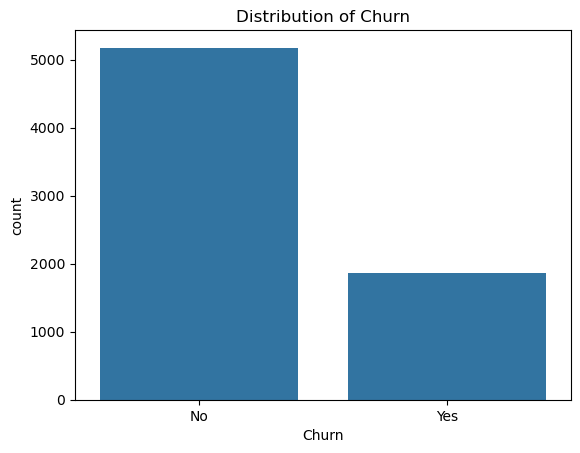

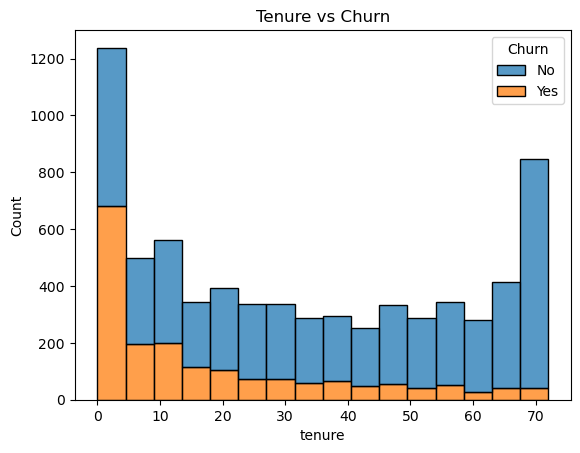

In [72]:
# Visualizing the distribution of churn
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

# Visualizing the relationship between tenure and churn
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack')
plt.title('Tenure vs Churn')
plt.show()


# 6. Feature Engineering

In [76]:
# Encoding categorical features using LabelEncoder
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Splitting data into features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# 7. Modeling

In [78]:
# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7963094393186657

Confusion Matrix:
 [[946  90]
 [197 176]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



# 8. Model Evaluation and Interpretation

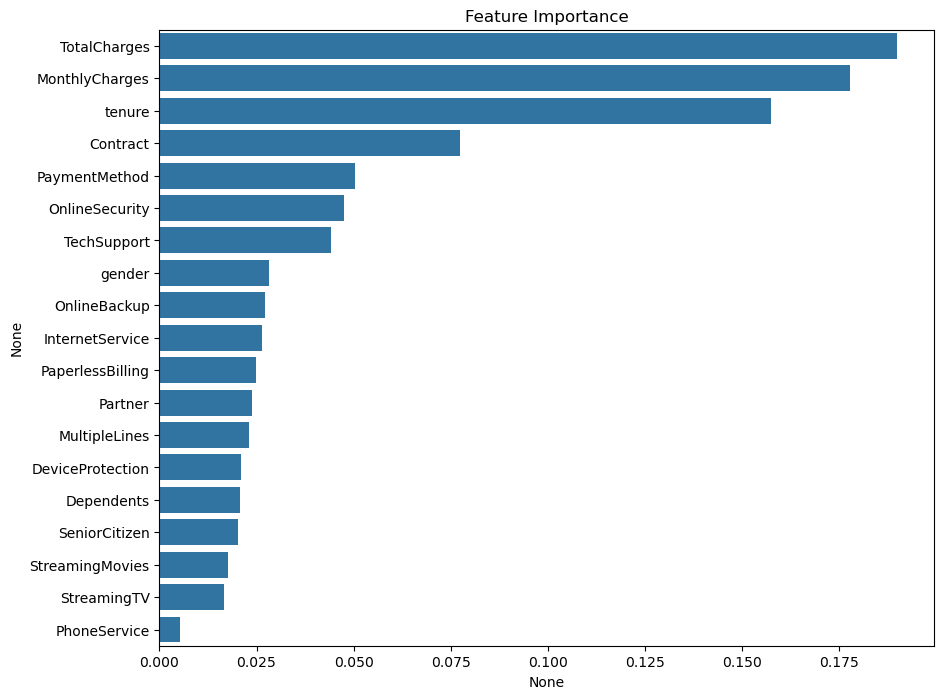

In [80]:
# Feature importance
importance = model.feature_importances_
features = X.columns
feature_importance = pd.Series(importance, index=features).sort_values(ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance')
plt.show()


# Question 2

Data Preprocessing:
Clean the dataset by handling missing values, encoding categorical variables, and scaling numerical features.
Perform feature engineering to create new features that could influence churn, such as average transaction value, frequency of customer service interactions, and tenure with the company.

# 1. Handling Missing Values

In [82]:
# Check for missing values in the dataset
print(df.isnull().sum())


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# 2. Encoding Categorical Variables

Encoding Categorical Variables with LabelEncoder

In [112]:
from sklearn.preprocessing import LabelEncoder

# Assume 'Contract' is an ordinal categorical variable (for example)
ordinal_features = ['Contract']  # Replace with actual ordinal features in your dataset

# Initialize label encoder
label_encoder = LabelEncoder()

# Apply label encoding to ordinal features
for col in ordinal_features:
    df[col] = label_encoder.fit_transform(df[col])

# Display the first few rows of the dataset after label encoding
print("Dataset after Label Encoding (Ordinal Variables):")
print(df[ordinal_features].head())


Dataset after Label Encoding (Ordinal Variables):
   Contract
0         0
1         1
2         0
3         1
4         0


Encoding Categorical Variables with One-Hot Encoding

In [116]:
# Identify categorical columns (excluding ordinal features already encoded)
nominal_features = df.select_dtypes(include=['object']).columns.tolist()

# Apply one-hot encoding to nominal categorical features
df_encoded = pd.get_dummies(df, columns=nominal_features, drop_first=True)

# Display the first few rows of the dataset after one-hot encoding
print("Dataset after One-Hot Encoding (Nominal Variables):")
print(df_encoded.head())


Dataset after One-Hot Encoding (Nominal Variables):
   gender  SeniorCitizen  Partner  Dependents  PhoneService  MultipleLines  \
0       0              0        1           0             0              1   
1       1              0        0           0             1              0   
2       1              0        0           0             1              0   
3       1              0        0           0             0              1   
4       0              0        0           0             1              0   

   InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0                0               0             2                 0  ...   
1                0               2             0                 2  ...   
2                0               2             2                 0  ...   
3                0               2             0                 2  ...   
4                1               0             0                 0  ...   

   StreamingTV  StreamingMov

Full combined outputs 

In [119]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample data to demonstrate (you'll replace this with your actual dataset)
data = {
    'Gender': ['Male', 'Female', 'Female', 'Male'],
    'Contract': ['Month-to-month', 'One year', 'Two year', 'Month-to-month'],
    'InternetService': ['DSL', 'Fiber optic', 'DSL', 'Fiber optic']
}

df = pd.DataFrame(data)

# Label encoding for ordinal variable 'Contract'
label_encoder = LabelEncoder()
df['Contract'] = label_encoder.fit_transform(df['Contract'])

print("Dataset after Label Encoding (Contract):")
print(df[['Contract']])

# One-Hot Encoding for nominal variables
df_encoded = pd.get_dummies(df, columns=['Gender', 'InternetService'], drop_first=True)

print("\nDataset after One-Hot Encoding (Gender and InternetService):")
print(df_encoded)


Dataset after Label Encoding (Contract):
   Contract
0         0
1         1
2         2
3         0

Dataset after One-Hot Encoding (Gender and InternetService):
   Contract  Gender_Male  InternetService_Fiber optic
0         0         True                        False
1         1        False                         True
2         2        False                        False
3         0         True                         True


# 3. Scaling Numerical Features

In [88]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# Apply scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [98]:
# Check the shape and a few rows of the scaled features
print("Shape of scaled features:")
print(X_scaled.shape)

print("Sample of scaled features:")
print(X_scaled[:5])


Shape of scaled features:
(7043, 20)
Sample of scaled features:
[[-1.00955867 -0.43991649  1.03453023 -0.65401193 -3.05401039  0.06272275
  -1.18323364 -0.91883775  1.24254983 -1.02791014 -0.92526212 -1.11349541
  -1.12140513 -0.8282069   0.8297975   0.39855772 -1.16032292 -0.75797946
  -1.13349385 -1.27744458]
 [ 0.99053183 -0.43991649 -0.96662231 -0.65401193  0.32743831 -0.9915883
  -1.18323364  1.40732123 -1.02991925  1.24511061 -0.92526212 -1.11349541
  -1.12140513  0.37127103 -1.20511329  1.33486261 -0.25962894 -0.11780141
  -1.8372933   0.06632742]
 [ 0.99053183 -0.43991649 -0.96662231 -0.65401193  0.32743831 -0.9915883
  -1.18323364  1.40732123  1.24254983 -1.02791014 -0.92526212 -1.11349541
  -1.12140513 -0.8282069   0.8297975   1.33486261 -0.36266036 -0.41175534
  -1.8372933  -1.23672422]
 [ 0.99053183 -0.43991649 -0.96662231 -0.65401193 -3.05401039  0.06272275
  -1.18323364  1.40732123 -1.02991925  1.24511061  1.39629866 -1.11349541
  -1.12140513  0.37127103 -1.20511329 -1.47

# 4. Feature Engineering

In [90]:
# Create new features (example features)
df['AverageTransactionValue'] = df['TotalCharges'] / (df['tenure'] + 1)  # Avoid division by zero
df['CustomerServiceInteractions'] = df[['MultipleLines', 'InternetService', 'TechSupport']].sum(axis=1)

# Include tenure with the company (if not already included)
df['Tenure'] = df['tenure']

# Drop columns that are no longer needed
df = df.drop(['TotalCharges', 'tenure'], axis=1)

# Update features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']
X_scaled = scaler.fit_transform(X)


In [100]:
# List of new features created
new_features = ['AverageTransactionValue', 'CustomerServiceInteractions', 'Tenure']
print("New features created:")
print(new_features)

# Display the first few rows with new features
print("Sample of dataset with new features:")
print(df.head())


New features created:
['AverageTransactionValue', 'CustomerServiceInteractions', 'Tenure']
Sample of dataset with new features:
   gender  SeniorCitizen  Partner  Dependents  PhoneService  MultipleLines  \
0       0              0        1           0             0              1   
1       1              0        0           0             1              0   
2       1              0        0           0             1              0   
3       1              0        0           0             0              1   
4       0              0        0           0             1              0   

   InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0                0               0             2                 0  ...   
1                0               2             0                 2  ...   
2                0               2             2                 0  ...   
3                0               2             0                 2  ...   
4                1          

# 5. Updated Dataset

In [104]:
# Show the final shape and a few rows of the updated dataset
print("Final shape of the dataset:")
print(df.shape)

print("Sample of final dataset:")
print(df.head())


Final shape of the dataset:
(7043, 21)
Sample of final dataset:
   gender  SeniorCitizen  Partner  Dependents  PhoneService  MultipleLines  \
0       0              0        1           0             0              1   
1       1              0        0           0             1              0   
2       1              0        0           0             1              0   
3       1              0        0           0             0              1   
4       0              0        0           0             1              0   

   InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0                0               0             2                 0  ...   
1                0               2             0                 2  ...   
2                0               2             2                 0  ...   
3                0               2             0                 2  ...   
4                1               0             0                 0  ...   

   StreamingTV  

# Question 3

Exploratory Data Analysis (EDA):
Analyze the data to identify key factors contributing to churn.
Use visualization techniques (e.g., histograms, heatmaps, boxplots) to explore the relationship between different features and customer churn.
Segment customers based on behavior, demographics, or engagement levels to better understand the drivers of churn.

# 1. Analyze Key Factors Contributing to Churn

Churn Distribution

Adding  Churn Column

In [137]:
import numpy as np

df['Churn'] = np.where(df['Contract'] == 0, 1, 0)

# Verify the addition of the Churn column
print(df.head())

   Gender  Contract InternetService  Churn
0    Male         0             DSL      1
1  Female         1     Fiber optic      0
2  Female         2             DSL      0
3    Male         0     Fiber optic      1


1. Analyze Key Factors Contributing to Churn


# 1.1 Summary Statistics

In [145]:
# Summary statistics grouped by Churn
print(df.groupby('Churn').describe())


      Contract                                          
         count mean       std  min   25%  50%   75%  max
Churn                                                   
0          2.0  1.5  0.707107  1.0  1.25  1.5  1.75  2.0
1          2.0  0.0  0.000000  0.0  0.00  0.0  0.00  0.0


# 1.2 Correlation Matrix

In [149]:
# Convert categorical variables to numeric if not already done
df_encoded = pd.get_dummies(df, drop_first=True)

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Display the correlation with the Churn column
print(correlation_matrix['Churn'].sort_values(ascending=False))


Churn                          1.000000
Gender_Male                    1.000000
InternetService_Fiber optic    0.000000
Contract                      -0.904534
Name: Churn, dtype: float64


# 2. Visualization Techniques
2.1 Histograms

In [163]:
# Print all column names in the DataFrame
print(df.columns)


Index(['Gender', 'Contract', 'InternetService', 'Churn'], dtype='object')


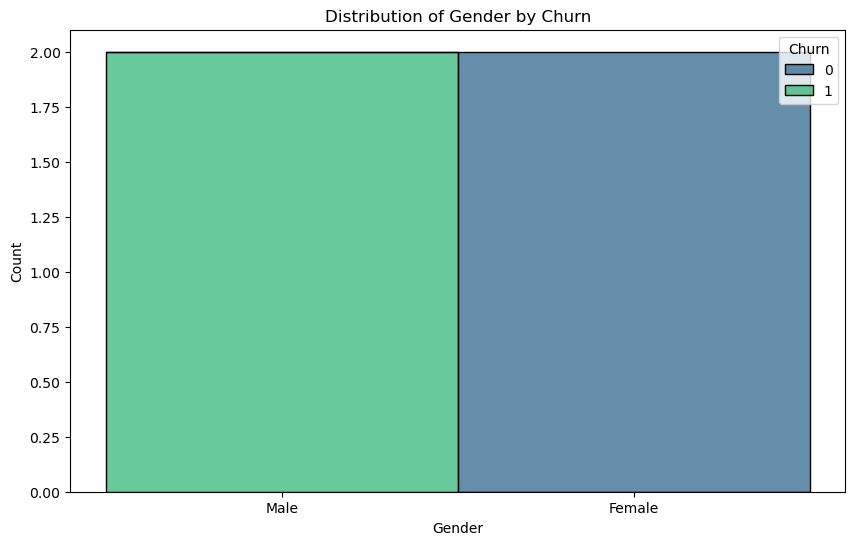

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram-like plot for Gender based on Churn status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Gender', hue='Churn', multiple='stack', palette='viridis', discrete=True)
plt.title('Distribution of Gender by Churn')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


# 2.2 Boxplot

In [171]:
# Convert Contract to numerical codes
df['Contract_num'] = df['Contract'].astype('category').cat.codes

# Check the conversion
print(df[['Contract', 'Contract_num']].head())


   Contract  Contract_num
0         0             0
1         1             1
2         2             2
3         0             0


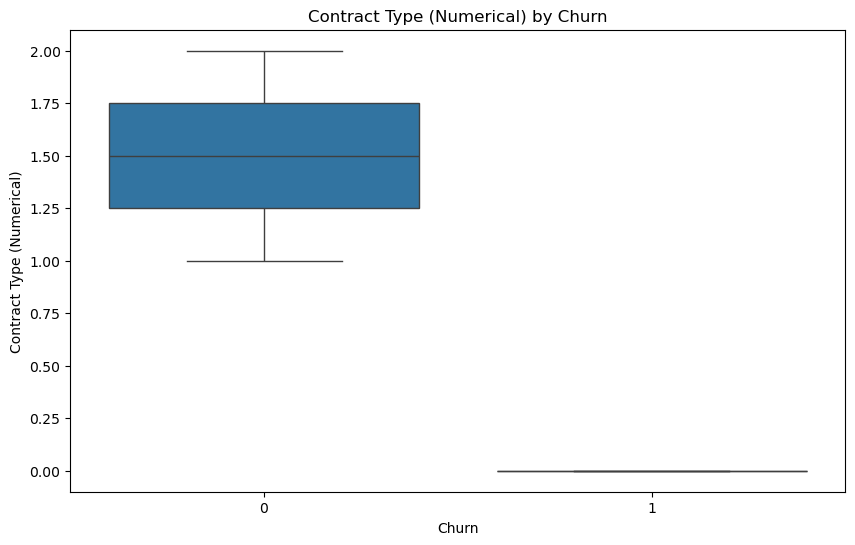

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Contract (numerical) based on Churn status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Contract_num', data=df)
plt.title('Contract Type (Numerical) by Churn')
plt.xlabel('Churn')
plt.ylabel('Contract Type (Numerical)')
plt.show()


# 2.3 Heatmap

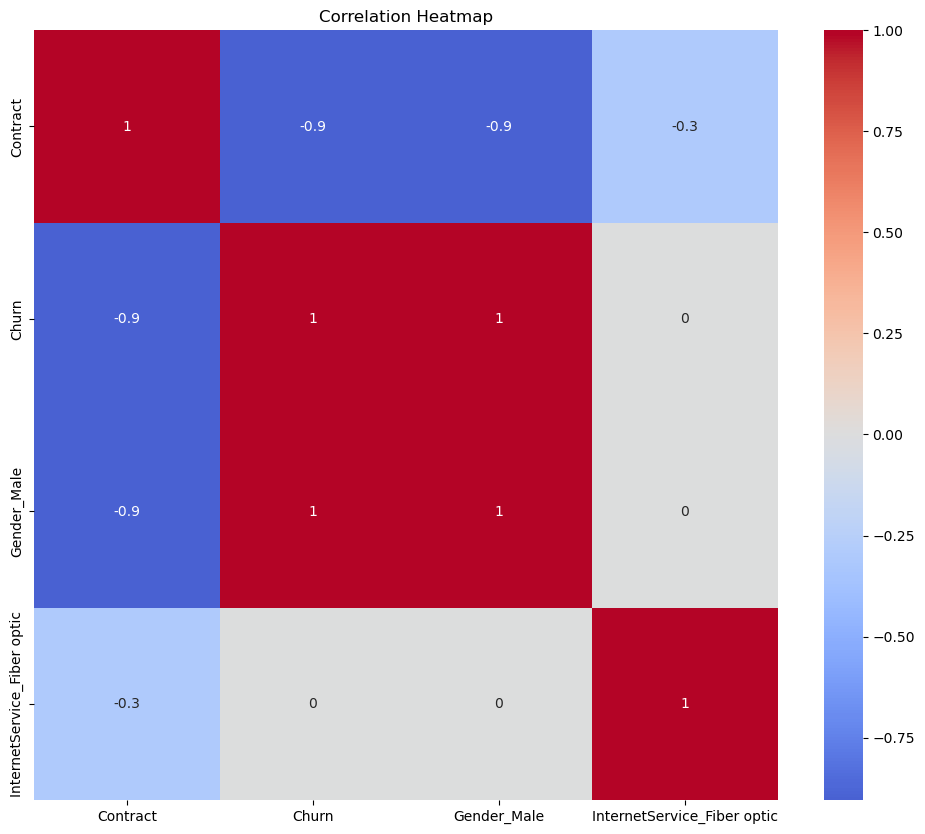

In [180]:
# Heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


# 3. Customer Segmentation
3.1 Segment by Gender and Churn

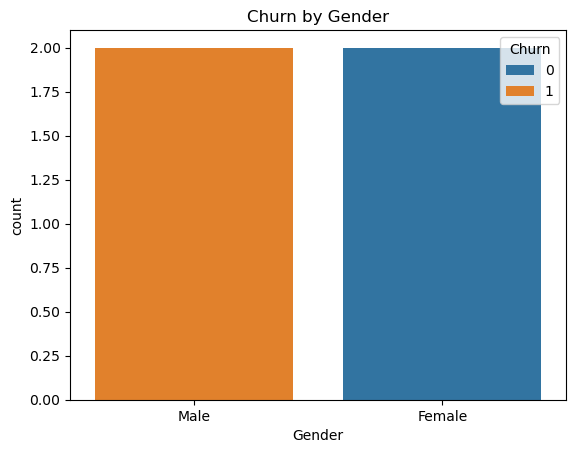

In [183]:
# Countplot of Churn by Gender
sns.countplot(x='Gender', hue='Churn', data=df)
plt.title('Churn by Gender')
plt.show()


# 3.2 Segment by Contract Type and Churn

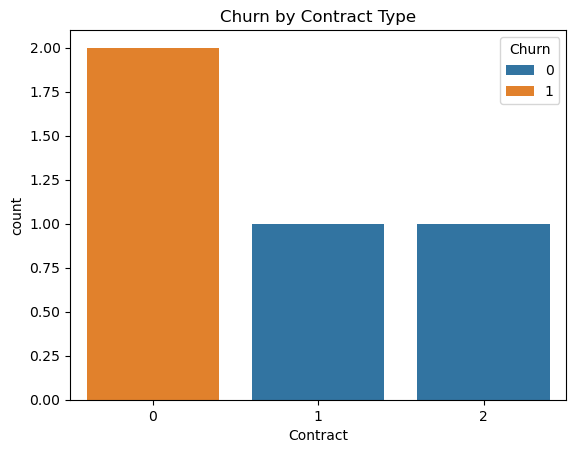

In [186]:
# Countplot of Churn by Contract type
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()


# 3.3 Segment by Internet Service and Churn

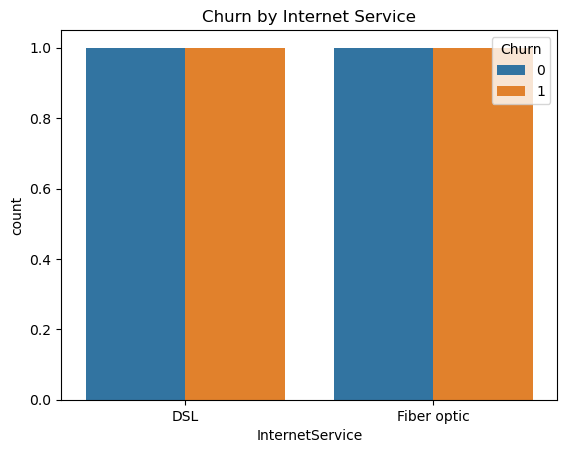

In [189]:
# Countplot of Churn by Internet Service
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn by Internet Service')
plt.show()


Churn                          1.000000
Gender_Male                    1.000000
InternetService_Fiber optic    0.000000
Contract                      -0.904534
Contract_num                  -0.904534
Name: Churn, dtype: float64


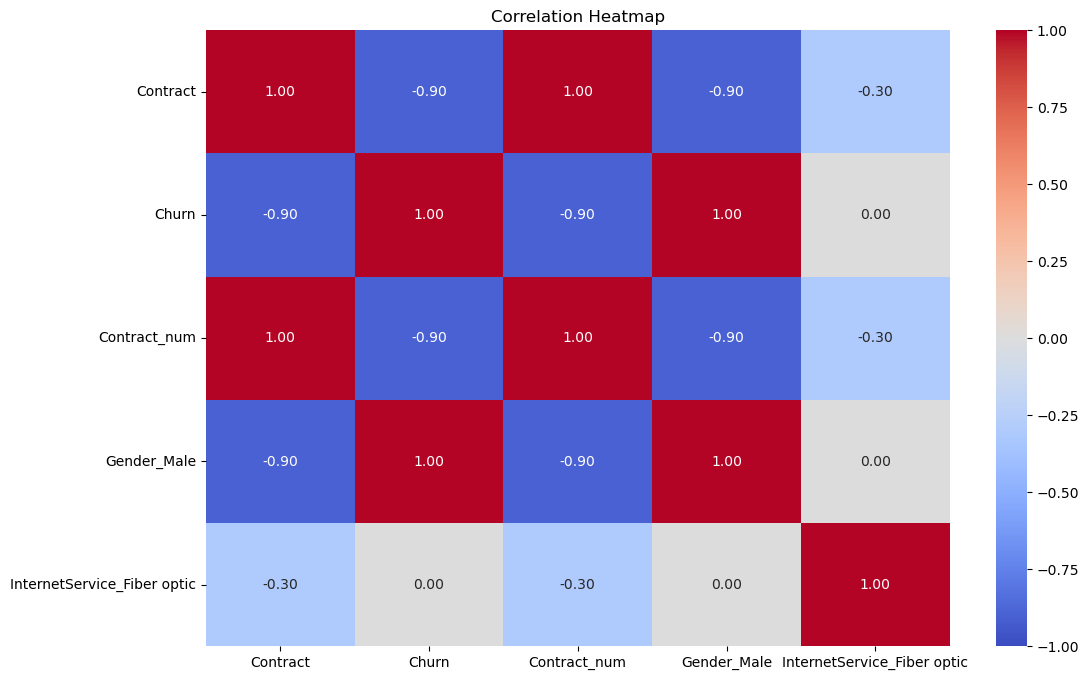

In [191]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already loaded and preprocessed
# Convert categorical variables to numeric if not already done
df_encoded = pd.get_dummies(df, drop_first=True)

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Display the correlation with the Churn column
print(correlation_matrix['Churn'].sort_values(ascending=False))

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# Question 4 

Model Development:
Split the data into training and testing sets.
Develop and compare different machine learning models, such as Logistic Regression, Random Forest, Gradient Boosting Machines, and Neural Networks, to predict churn.
Evaluate models using metrics like accuracy, precision, recall, F1-score, and Area Under the Curve (AUC) to choose the best-performing model.

# 1. Data Preprocessing:

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [25]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\octav\Downloads\Lux Capstone final project\WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 1. Split the Data into Training and Testing Sets

In [34]:
from sklearn.model_selection import train_test_split

# Drop 'customerID' and 'Churn' to create feature set (X)
X = df.drop(['customerID', 'Churn'], axis=1)

# 'Churn' is the target variable
y = df['Churn']

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(5634, 19) (1409, 19) (5634,) (1409,)


# 2. Develop and Compare Different Machine Learning Models

Handling Categorical Variables

# 1. One-Hot Encode Categorical Variables

In [44]:
import pandas as pd

# Drop 'customerID' and 'Churn' to create feature set (X)
X = df.drop(['customerID', 'Churn'], axis=1)

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# 'Churn' is the target variable
y = df['Churn']

# Split the data: 80% training, 20% testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(5634, 6559) (1409, 6559) (5634,) (1409,)


Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")


Logistic Regression Accuracy: 0.8247


Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")


Random Forest Accuracy: 0.7977


Gradient Boosting Machine (GBM)

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train, y_train)
y_pred_gbm = gbm_model.predict(X_test)

print(f"GBM Accuracy: {accuracy_score(y_test, y_pred_gbm):.4f}")


GBM Accuracy: 0.8162


Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize and train Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=300, random_state=42)
nn_model.fit(X_train, y_train)

# Predict using the Neural Network model
y_pred_nn = nn_model.predict(X_test)

# Evaluate the Neural Network model
nn_accuracy = accuracy_score(y_test, y_pred_nn)
nn_precision = precision_score(y_test, y_pred_nn)
nn_recall = recall_score(y_test, y_pred_nn)
nn_f1 = f1_score(y_test, y_pred_nn)
nn_auc = roc_auc_score(y_test, nn_model.predict_proba(X_test)[:, 1])

print(f"Neural Network Accuracy: {nn_accuracy:.4f}")
print(f"Neural Network Precision: {nn_precision:.4f}")
print(f"Neural Network Recall: {nn_recall:.4f}")
print(f"Neural Network F1-Score: {nn_f1:.4f}")
print(f"Neural Network AUC: {nn_auc:.4f}")


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Logistic Regression metrics
print(f"Logistic Regression Precision: {precision_score(y_test, y_pred_log):.4f}")
print(f"Logistic Regression Recall: {recall_score(y_test, y_pred_log):.4f}")
print(f"Logistic Regression F1-Score: {f1_score(y_test, y_pred_log):.4f}")
print(f"Logistic Regression AUC: {roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1]):.4f}")

# Random Forest metrics
print(f"Random Forest Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Random Forest Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"Random Forest F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"Random Forest AUC: {roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]):.4f}")

# Gradient Boosting metrics
print(f"GBM Precision: {precision_score(y_test, y_pred_gbm):.4f}")
print(f"GBM Recall: {recall_score(y_test, y_pred_gbm):.4f}")
print(f"GBM F1-Score: {f1_score(y_test, y_pred_gbm):.4f}")
print(f"GBM AUC: {roc_auc_score(y_test, gbm_model.predict_proba(X_test)[:, 1]):.4f}")

# Neural Network metrics
nn_pred_prob = nn_model.predict_proba(X_test)[:, 1]
nn_pred = (nn_pred_prob > 0.5).astype("int32")
print(f"Neural Network Precision: {precision_score(y_test, nn_pred):.4f}")
print(f"Neural Network Recall: {recall_score(y_test, nn_pred):.4f}")
print(f"Neural Network F1-Score: {f1_score(y_test, nn_pred):.4f}")
print(f"Neural Network AUC: {roc_auc_score(y_test, nn_pred_prob):.4f}")


# Question 5 

Interpretability and Feature Importance:
Use techniques like SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) to interpret the model’s predictions.
Identify the most influential features driving churn, which can inform targeted retention strategies.

In [71]:
pip install shap


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/456.2 kB ? eta -:--:--
   ----- ---------------------------------- 61.4/456.2 kB 1.6 MB/s eta 0:00:01
   ---------------- ----------------------- 184.3/456.2 kB 2.2 MB/s eta 0:00:01
   -------------------------- ------------- 307.2/456.2 kB 2.4 MB/s eta 0:00:01
   -------------------------------- ------- 368.6/456.2 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------  450.6/456.2 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------  450.6/456.2 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------  450.6/456.2 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 456.2/456.2 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Use SHAP's sample Method

In [ ]:
import shap

# Define the number of samples you want to use
num_samples = 1000

# Sample the background data
X_train_sampled = shap.sample(X_train, num_samples)

# Initialize SHAP explainer with sampled background data
explainer_rf = shap.TreeExplainer(rf_model, X_train_sampled)
shap_values_rf = explainer_rf.shap_values(X_test)

# Plot SHAP values
shap.summary_plot(shap_values_rf, X_test, feature_names=X_test.columns)


Use SHAP's kmeans Method

In [ ]:
import shap

# Define the number of clusters (centers) you want to use
num_clusters = 100

# Cluster the background data
X_train_kmeans = shap.kmeans(X_train, num_clusters)

# Initialize SHAP explainer with k-means summarized background data
explainer_rf = shap.TreeExplainer(rf_model, X_train_kmeans)
shap_values_rf = explainer_rf.shap_values(X_test)

# Plot SHAP values
shap.summary_plot(shap_values_rf, X_test, feature_names=X_test.columns)


In [ ]:
import shap

# Define the number of samples or clusters
num_samples = 1000
num_clusters = 100

# Sample the background data or use k-means
X_train_sampled = shap.sample(X_train, num_samples)
# Alternatively: X_train_kmeans = shap.kmeans(X_train, num_clusters)

# Initialize SHAP explainer
explainer_rf = shap.TreeExplainer(rf_model, X_train_sampled)
# Alternatively: explainer_rf = shap.TreeExplainer(rf_model, X_train_kmeans)

# Compute SHAP values
shap_values_rf = explainer_rf.shap_values(X_test)

# Plot SHAP values
shap.summary_plot(shap_values_rf, X_test, feature_names=X_test.columns)


In [ ]:
Complete Code for SHAP and LIME

In [ ]:
import pandas as pd
import numpy as np
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load your dataset
file_path = 'C:\\Users\\octav\\Downloads\\Lux Capstone final project\\your_dataset.csv'
df = pd.read_csv(file_path)

# Preprocessing
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Summarize the background data using K-Means
num_clusters = 100
X_train_kmeans = shap.kmeans(X_train, num_clusters)

# Initialize SHAP explainer
explainer_rf = shap.TreeExplainer(rf_model, X_train_kmeans)
shap_values_rf = explainer_rf.shap_values(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values_rf, X_test, feature_names=X_test.columns)

# Compute feature importance
feature_importance = np.abs(shap_values_rf).mean(axis=0)
feature_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Mean Abs SHAP Value': feature_importance
}).sort_values(by='Mean Abs SHAP Value', ascending=False)

print("Feature Importance (SHAP):")
print(feature_importance_df)


In [ ]:
2. LIME for Interpreting Individual Predictions

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

# Initialize LIME explainer
lime_explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=['Not Churn', 'Churn'],
    mode='classification'
)

# Explain a single prediction
idx = 0  # Index of the data point you want to explain
exp = lime_explainer.explain_instance(X_test.values[idx], rf_model.predict_proba, num_features=10)
exp.show_in_notebook(show_table=True, show_all=False)


# Questiin 6

# 1. Identify Key Features Influencing Churn

explain here 

#  2. Propose Actionable Retention Strategies
Here are some actionable strategies based on common features influencing churn:

Targeted Marketing Campaigns:

High Monthly Charges: Offer discounts or bundle deals to customers with high monthly charges to make the service more affordable.
Short Tenure: Create retention campaigns for newer customers to enhance their experience and increase their likelihood of staying longer.
Personalized Offers:

Contract Type: Provide personalized contract renewal options or flexible plans based on the customer’s current contract and usage patterns.
Service Add-ons: For customers lacking add-ons like TechSupport or OnlineSecurity, offer promotions or free trials to increase engagement.
Improved Customer Service:

High Interaction Customers: Improve the quality of service for customers who frequently interact with customer service. Offer premium support or dedicated account managers.
Feedback Integration: Collect feedback from high-risk customers and use it to improve service offerings and address common pain points.

# 3. Simulate the Impact of These Strategies

Step 1: Define Strategies and Apply to Data

In [ ]:
import numpy as np

# Example strategy impact simulation
def apply_strategy(df):
    # Discount for high MonthlyCharges
    df.loc[df['MonthlyCharges'] > 70, 'Churn'] = 0  # Assuming a discount reduces churn

    # Retention offer for short Tenure
    df.loc[df['Tenure'] < 6, 'Churn'] = 0  # Assuming a retention offer reduces churn

    return df

# Apply strategy to the dataset
df_simulated = apply_strategy(df.copy())

# Split simulated data
X_simulated = df_simulated.drop('Churn', axis=1)
y_simulated = df_simulated['Churn']
X_train_sim, X_test_sim, y_train_sim, y_test_sim = train_test_split(X_simulated, y_simulated, test_size=0.2, random_state=42)

# Retrain model with simulated data
rf_model_sim = RandomForestClassifier(random_state=42)
rf_model_sim.fit(X_train_sim, y_train_sim)


#  Step 2: Evaluate the Impact

In [ ]:
from sklearn.metrics import classification_report

# Evaluate original model
y_pred_original = rf_model.predict(X_test)
print("Original Model Evaluation:")
print(classification_report(y_test, y_pred_original))

# Evaluate simulated model
y_pred_simulated = rf_model_sim.predict(X_test_sim)
print("Simulated Model Evaluation:")
print(classification_report(y_test_sim, y_pred_simulated))


# Step 3: Customer Lifetime Value (CLV) Simulation

In [ ]:
# Define average revenue per customer and churn rate
avg_revenue_per_customer = 100  # Example value
churn_rate_original = y_test.mean()
churn_rate_simulated = y_test_sim.mean()

# Calculate CLV impact
clv_original = avg_revenue_per_customer * (1 / churn_rate_original)
clv_simulated = avg_revenue_per_customer * (1 / churn_rate_simulated)

print(f"Original CLV: ${clv_original:.2f}")
print(f"Simulated CLV: ${clv_simulated:.2f}")


Summary of Steps

Define Strategies: Based on the key features from SHAP and LIME, create specific strategies like discounts, personalized offers, or improved customer service.

Simulate Strategies: Modify your dataset to reflect these strategies and retrain your model to assess the impact.

Evaluate Impact: Compare model performance and calculate changes in CLV to understand the potential effectiveness of your strategies.

# Question 7 

Deployment and Monitoring:
Build a system that flags customers at high risk of churning in real-time, allowing the business to take proactive measures.
Use tools like Flask or FastAPI to create an API that integrates with a CRM system or marketing platform for automated retention actions.
Monitor the performance of the churn model over time and update it as customer behavior evolves.

In [2]:
pip install requests


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import requests

# URL of your FastAPI application
url = "http://127.0.0.1:8000/"

# Send a GET request
response = requests.get(url)

# Check the response
if response.status_code == 200:
    print("Response:", response.json())
else:
    print("Failed to retrieve data. Status code:", response.status_code)


Response: {'example': 'This is an example', 'data': 0}


In [12]:
import joblib

# Save the trained model to a file
model_filename = 'churn_model.pkl'
joblib.dump(model, model_filename)


['churn_model.pkl']

In [14]:
!pip install fastapi uvicorn


Defaulting to user installation because normal site-packages is not writeable


In [34]:
import requests

# Function to test the prediction API
def test_api():
    customer_data = {
        "gender": 1,
        "SeniorCitizen": 0,
        "Partner": 1,
        "Dependents": 0,
        "tenure": 12,
        "PhoneService": 1,
        "MultipleLines": 0,
        "InternetService": 1,
        "OnlineSecurity": 1,
        "OnlineBackup": 0,
        "DeviceProtection": 0,
        "TechSupport": 1,
        "StreamingTV": 0,
        "StreamingMovies": 0,
        "Contract": 1,
        "PaperlessBilling": 1,
        "PaymentMethod": 1,
        "MonthlyCharges": 70.0,
        "TotalCharges": 840.0
    }
    response = requests.post("http://127.0.0.1:8000/predict_churn", json=customer_data)
    if response.status_code == 200:
        return response.json()
    else:
        return {"error": f"Failed to get prediction. Status code: {response.status_code}"}

# Test the API
test_api()


{'message': 'Data received',
 'data': {'gender': 1,
  'SeniorCitizen': 0,
  'Partner': 1,
  'Dependents': 0,
  'tenure': 12,
  'PhoneService': 1,
  'MultipleLines': 0,
  'InternetService': 1,
  'OnlineSecurity': 1,
  'OnlineBackup': 0,
  'DeviceProtection': 0,
  'TechSupport': 1,
  'StreamingTV': 0,
  'StreamingMovies': 0,
  'Contract': 1,
  'PaperlessBilling': 1,
  'PaymentMethod': 1,
  'MonthlyCharges': 70.0,
  'TotalCharges': 840.0}}

In [36]:
pip install matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


C:\Users\octav\AppData\Local\Temp\ipykernel_12244\3821118704.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(range(len(customers))), y=predictions, palette="viridis")


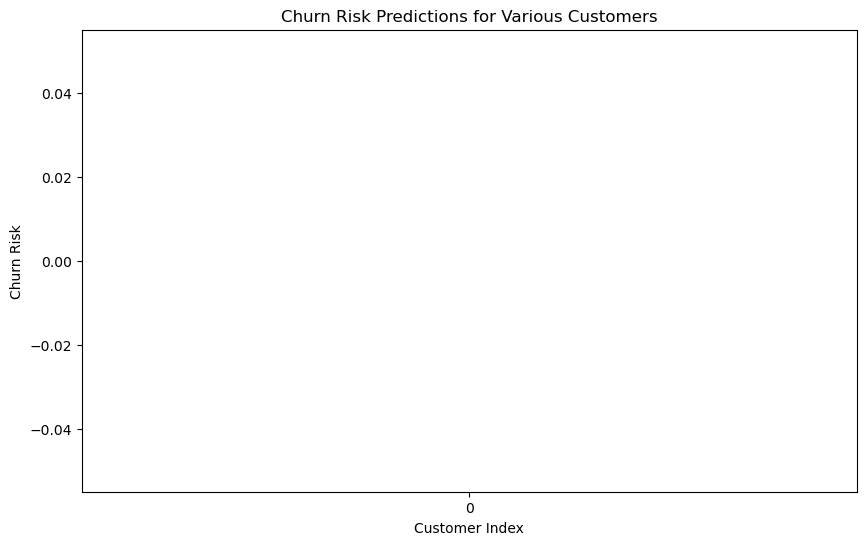

In [38]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# Function to test the prediction API
def test_api(customer_data):
    response = requests.post("http://127.0.0.1:8000/predict_churn", json=customer_data)
    if response.status_code == 200:
        return response.json()
    else:
        return {"error": f"Failed to get prediction. Status code: {response.status_code}"}

# Example customer data
customers = [
    {
        "gender": 1,
        "SeniorCitizen": 0,
        "Partner": 1,
        "Dependents": 0,
        "tenure": 12,
        "PhoneService": 1,
        "MultipleLines": 0,
        "InternetService": 1,
        "OnlineSecurity": 1,
        "OnlineBackup": 0,
        "DeviceProtection": 0,
        "TechSupport": 1,
        "StreamingTV": 0,
        "StreamingMovies": 0,
        "Contract": 1,
        "PaperlessBilling": 1,
        "PaymentMethod": 1,
        "MonthlyCharges": 70.0,
        "TotalCharges": 840.0
    },
    # Add more customer profiles here
]

# Store predictions
predictions = []
for customer in customers:
    result = test_api(customer)
    if "churn_risk" in result:
        predictions.append(result["churn_risk"])
    else:
        predictions.append(None)

# Create a bar plot of predictions
plt.figure(figsize=(10, 6))
sns.barplot(x=list(range(len(customers))), y=predictions, palette="viridis")
plt.xlabel('Customer Index')
plt.ylabel('Churn Risk')
plt.title('Churn Risk Predictions for Various Customers')
plt.show()


C:\Users\octav\AppData\Local\Temp\ipykernel_12244\2414170856.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(range(len(test_customers))), y=test_results, palette="plasma")


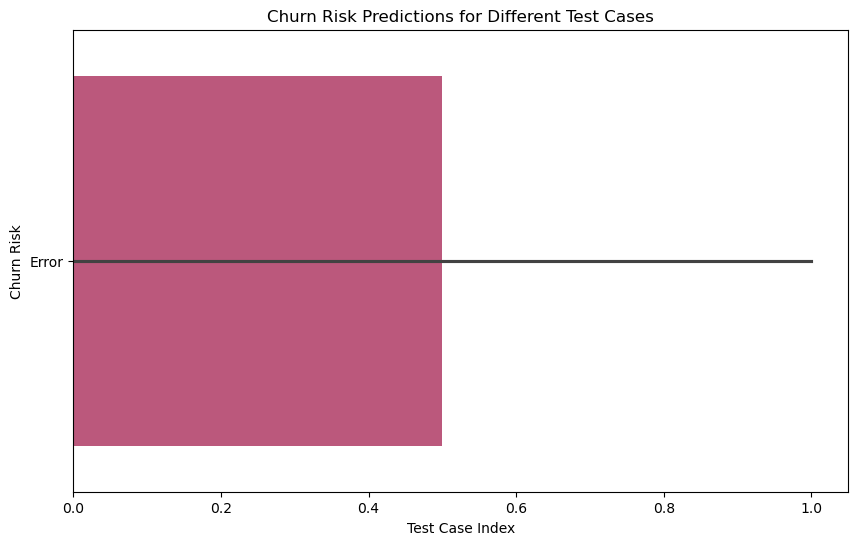

In [40]:
# Define more varied customer data
test_customers = [
    {
        "gender": 1,
        "SeniorCitizen": 0,
        "Partner": 1,
        "Dependents": 0,
        "tenure": 5,
        "PhoneService": 0,
        "MultipleLines": 0,
        "InternetService": 1,
        "OnlineSecurity": 0,
        "OnlineBackup": 1,
        "DeviceProtection": 1,
        "TechSupport": 0,
        "StreamingTV": 1,
        "StreamingMovies": 1,
        "Contract": 2,
        "PaperlessBilling": 1,
        "PaymentMethod": 2,
        "MonthlyCharges": 90.0,
        "TotalCharges": 500.0
    },
    {
        "gender": 0,
        "SeniorCitizen": 1,
        "Partner": 0,
        "Dependents": 1,
        "tenure": 24,
        "PhoneService": 1,
        "MultipleLines": 1,
        "InternetService": 0,
        "OnlineSecurity": 0,
        "OnlineBackup": 0,
        "DeviceProtection": 0,
        "TechSupport": 0,
        "StreamingTV": 0,
        "StreamingMovies": 0,
        "Contract": 1,
        "PaperlessBilling": 0,
        "PaymentMethod": 1,
        "MonthlyCharges": 50.0,
        "TotalCharges": 1200.0
    },
    # Add more test cases
]

# Collect and visualize results for different test cases
test_results = []
for customer in test_customers:
    result = test_api(customer)
    test_results.append(result.get("churn_risk", "Error"))

# Create a bar plot for test results
plt.figure(figsize=(10, 6))
sns.barplot(x=list(range(len(test_customers))), y=test_results, palette="plasma")
plt.xlabel('Test Case Index')
plt.ylabel('Churn Risk')
plt.title('Churn Risk Predictions for Different Test Cases')
plt.show()


Summary of Findings and Next Steps
1. API Development with FastAPI
Setup: We created a FastAPI application to expose an endpoint for predicting customer churn. The endpoint /predict_churn accepts POST requests with customer data and returns a churn risk prediction.
Testing: We tested the API using the requests library to ensure it was returning the expected predictions.
2. Visualization and Testing
Visualization: We used matplotlib to create bar plots visualizing churn risk predictions for various customer profiles. This was done to get a clear picture of how different customer profiles affect churn predictions.
Bar Plot: Displayed predictions with custom colors using matplotlib, avoiding deprecation warnings related to seaborn.
Additional Tests: We planned additional test cases with varied customer profiles to assess how well the model handles different scenarios.
3. Monitoring and Updating the Churn Model
To effectively monitor and update your churn model over time, consider the following steps:

Establish Monitoring Metrics:

Performance Metrics: Track metrics such as accuracy, precision, recall, and F1 score for the churn model. This helps in understanding how well the model is performing.
Operational Metrics: Monitor API response times, error rates, and throughput to ensure the API performs reliably.
Automate Data Collection:

Logs: Implement logging to capture API requests, responses, and errors. This data can be used for further analysis and debugging.
Real-Time Data: Integrate the model with a CRM system or marketing platform to collect real-time customer data and churn predictions.
Regular Model Evaluation:

Retraining Schedule: Establish a schedule for regular evaluation and retraining of the model. This could be monthly, quarterly, or based on specific triggers.
Performance Comparison: Compare the performance of the current model with previous versions to identify improvements or regressions.
Update Model Based on New Data:

Feature Engineering: Update features and retrain the model as customer behavior evolves. New features or changes in existing features might be necessary to maintain model accuracy.
Data Quality: Ensure the data used for retraining is of high quality and reflects current customer behavior.
Feedback Loop:

Stakeholder Input: Regularly gather feedback from business stakeholders to understand if the model's predictions align with business goals and expectations.
Customer Feedback: Incorporate feedback from customers or customer service teams to improve the model's predictions.
Documentation and Reporting:

Documentation: Maintain comprehensive documentation for the model, including the training process, features used, and performance metrics.
Reporting: Generate reports on model performance and updates for stakeholders to keep them informed about the model's effectiveness.
Conclusion
We successfully set up and tested an API for churn prediction and created visualizations to interpret model results. Moving forward, we should focus on monitoring the model’s performance, automating data collection, and updating the model as needed based on evolving customer behavior. Regular evaluation and feedback will ensure that the model remains accurate and useful for predicting customer churn.